In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from FCM import FCM
from PCM import PCM
# import pyclustertend

In [25]:
data = pd.read_csv('../data/wine-clustering.csv')
cols = ['Color_Intensity', 'Hue']
data = data.drop(columns=cols)
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,1.62,840


In [26]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data

array([[0.84210526, 0.1916996 , 0.57219251, ..., 0.59305994, 0.97069597,
        0.56134094],
       [0.57105263, 0.2055336 , 0.4171123 , ..., 0.27444795, 0.78021978,
        0.55064194],
       [0.56052632, 0.3201581 , 0.70053476, ..., 0.75709779, 0.6959707 ,
        0.64693295],
       ...,
       [0.58947368, 0.69960474, 0.48128342, ..., 0.29652997, 0.10622711,
        0.39728959],
       [0.56315789, 0.36561265, 0.54010695, ..., 0.33123028, 0.12820513,
        0.40085592],
       [0.81578947, 0.66403162, 0.73796791, ..., 0.29652997, 0.12087912,
        0.20114123]])

(178, 1)
(178, 1)


/var/folders/z5/b9yhk9k12l31fz69p714mhyw0000gn/T/ipykernel_45395/622195988.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_features[:, 0], pca_features[:, 1], cmap=colors)


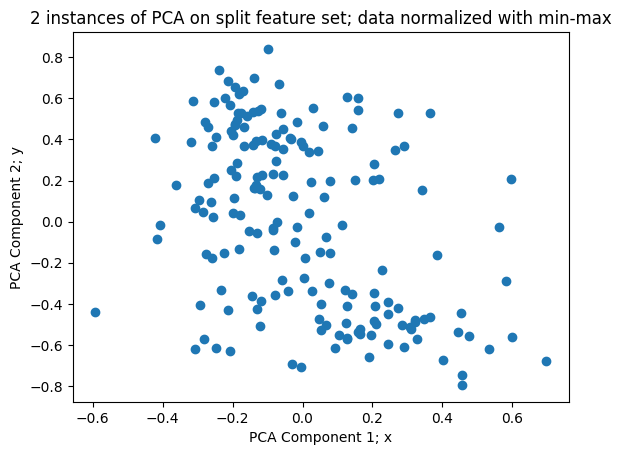

In [27]:
pca1 = PCA(n_components=1)
X_pca1 = pca1.fit_transform(data[:, :5])

pca2 = PCA(n_components=1)
X_pca2 = pca2.fit_transform(data[:, 5:])

print(X_pca1.shape)
print(X_pca2.shape)

pca_features = np.vstack((X_pca1.flatten(), X_pca2.flatten())).T

colors = ListedColormap(['#ff0000', '#00ff00', '#1700ff'])

plt.scatter(pca_features[:, 0], pca_features[:, 1], cmap=colors)
ax = plt.gca()
ax.ticklabel_format(useOffset=False)
ax.set_xlabel("PCA Component 1; x")
ax.set_ylabel("PCA Component 2; y")
plt.title("2 instances of PCA on split feature set; data normalized with min-max")
plt.show()